# Pandas

In [92]:
import pandas as pd
import yfinance as yf
import numpy as np


In [93]:
inicio= '2010-01-01'
dados_acao = yf.download('PETR4.SA', start= inicio)['Close']
dados_acao = dados_acao.to_frame()
dados_acao

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2010-01-04,37.320000
2010-01-05,37.000000
2010-01-06,37.500000
2010-01-07,37.150002
2010-01-08,36.950001
...,...
2023-10-06,33.509998
2023-10-09,34.950001
2023-10-10,35.209999


In [94]:
media_movel_250d = dados_acao.rolling(250).mean()

media_movel_250d

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2023-10-06,27.91184
2023-10-09,27.91712
2023-10-10,27.92496


In [95]:
dados_acao['MM250D'] = media_movel_250d.values
dados_acao = dados_acao.dropna()

dados_acao.tail(5)

,Close,MM250D
Date,,
2023-10-06,33.509998,27.91184
2023-10-09,34.950001,27.91712
2023-10-10,35.209999,27.92496
2023-10-11,35.119999,27.93344
2023-10-13,36.279999,27.94280


<Axes: xlabel='Date'>

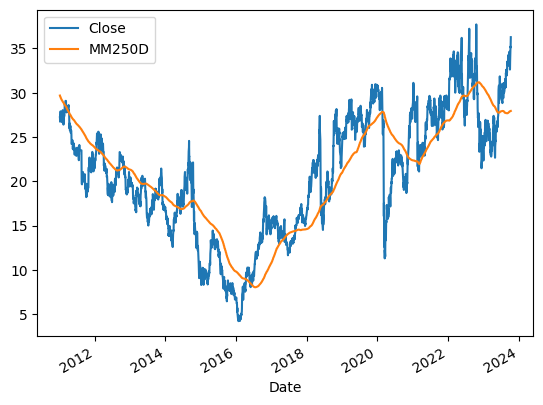

In [96]:
dados_acao.plot()

In [97]:
#criando uma coluna com ordem, baseado no valor da acao comparado a média móvel
dados_acao["Ordem"] = np.where(dados_acao['Close'] > dados_acao['MM250D'], "Compra", "Venda")
dados_acao

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_9264\3026790732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_acao["Ordem"] = np.where(dados_acao['Close'] > dados_acao['MM250D'], "Compra", "Venda")


,Close,MM250D,Ordem
Date,,,
2011-01-05,27.219999,29.68300,Venda
2011-01-06,27.110001,29.64216,Venda
2011-01-07,26.730000,29.60108,Venda
2011-01-10,26.980000,29.55900,Venda
2011-01-11,27.150000,29.51900,Venda
...,...,...,...
2023-10-06,33.509998,27.91184,Compra
2023-10-09,34.950001,27.91712,Compra
2023-10-10,35.209999,27.92496,Compra


In [98]:
# .ewm ajuda a criar uma media movel espondencial, da mais peso aos ultimos elementos
media_movel_exp_252 = dados_acao['Close'].ewm(span= 252).mean()

media_movel_exp_252

Date
2011-01-05    27.219999
2011-01-06    27.164782
2011-01-07    27.018703
2011-01-10    27.008911
2011-01-11    27.037579
                ...    
2023-10-06    29.323640
2023-10-09    29.368117
2023-10-10    29.414298
2023-10-11    29.459403
2023-10-13    29.513320
Name: Close, Length: 3173, dtype: float64

<Axes: xlabel='Date'>

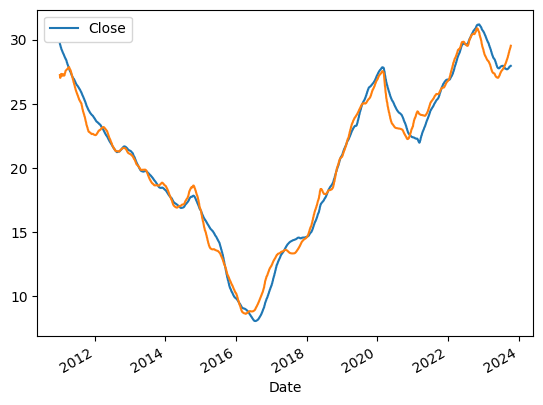

In [99]:
media_movel_250d.plot()
media_movel_exp_252.plot()

In [100]:
### Volatilidade diária 12m
## valor do dia / valor dia anterior
volatilidade_diaria_12m = dados_acao['Close'].pct_change().rolling(250).std()
volatilidade_diaria_12m

Date
2011-01-05         NaN
2011-01-06         NaN
2011-01-07         NaN
2011-01-10         NaN
2011-01-11         NaN
                ...   
2023-10-06    0.025998
2023-10-09    0.026137
2023-10-10    0.026130
2023-10-11    0.026126
2023-10-13    0.026147
Name: Close, Length: 3173, dtype: float64

In [101]:
volatilidade_diaria_12m = volatilidade_diaria_12m.dropna()
volatilidade_diaria_12m = volatilidade_diaria_12m * np.sqrt(252)
volatilidade_diaria_12m

Date
2012-01-05    0.284766
2012-01-06    0.284750
2012-01-09    0.284776
2012-01-10    0.284878
2012-01-11    0.284797
                ...   
2023-10-06    0.412703
2023-10-09    0.414916
2023-10-10    0.414803
2023-10-11    0.414735
2023-10-13    0.415069
Name: Close, Length: 2923, dtype: float64

<Axes: xlabel='Date'>

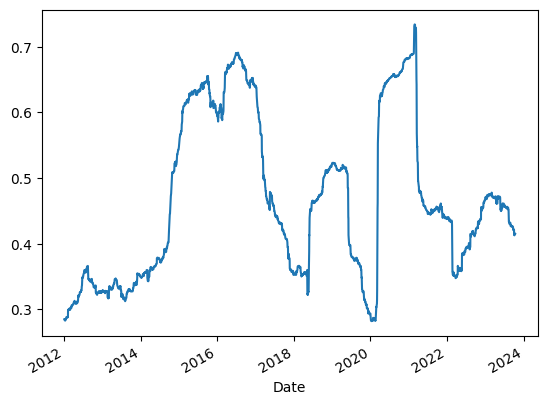

In [102]:
volatilidade_diaria_12m.plot()

## Desafios

In [103]:
# media_movel_30 dias
dados_mglu3 = yf.download('MGLU3.SA', '2020-01-01')['Close']
dados_mglu3 = dados_mglu3.to_frame()
dados_mglu3

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,12.3325
2020-01-03,12.2225
2020-01-06,12.2325
2020-01-07,12.1975
2020-01-08,12.5725
...,...
2023-10-06,1.7800
2023-10-09,1.8600
2023-10-10,1.9900


In [104]:
dados_mglu3['MM30D'] = dados_mglu3.rolling(30).mean()
dados_mglu3.dropna()

,Close,MM30D
Date,,
2020-02-12,13.9850,13.538833
2020-02-13,14.2625,13.603167
2020-02-14,14.0825,13.665167
2020-02-17,14.7125,13.747833
2020-02-18,14.5550,13.826417
...,...,...
2023-10-06,1.7800,2.424667
2023-10-09,1.8600,2.389333
2023-10-10,1.9900,2.358000


In [105]:
dados_mglu3['Sinais'] = np.where(dados_mglu3['Close'] > dados_mglu3['MM30D'], 'Compra', 'Vende')
#dados_mglu3 = dados_mglu3.dropna()
dados_mglu3

,Close,MM30D,Sinais
Date,,,
2020-01-02,12.3325,NaN,Vende
2020-01-03,12.2225,NaN,Vende
2020-01-06,12.2325,NaN,Vende
2020-01-07,12.1975,NaN,Vende
2020-01-08,12.5725,NaN,Vende
...,...,...,...
2023-10-06,1.7800,2.424667,Vende
2023-10-09,1.8600,2.389333,Vende
2023-10-10,1.9900,2.358000,Vende


In [106]:
dados_mglu3['MMEXP30D'] = dados_mglu3['Close'].ewm(span= 252).mean()
dados_mglu3

,Close,MM30D,Sinais,MMEXP30D
Date,,,,
2020-01-02,12.3325,NaN,Vende,12.332500
2020-01-03,12.2225,NaN,Vende,12.277282
2020-01-06,12.2325,NaN,Vende,12.262236
2020-01-07,12.1975,NaN,Vende,12.245859
2020-01-08,12.5725,NaN,Vende,12.312228
...,...,...,...,...
2023-10-06,1.7800,2.424667,Vende,3.689245
2023-10-09,1.8600,2.389333,Vende,3.674776
2023-10-10,1.9900,2.358000,Vende,3.661450


<Axes: xlabel='Date'>

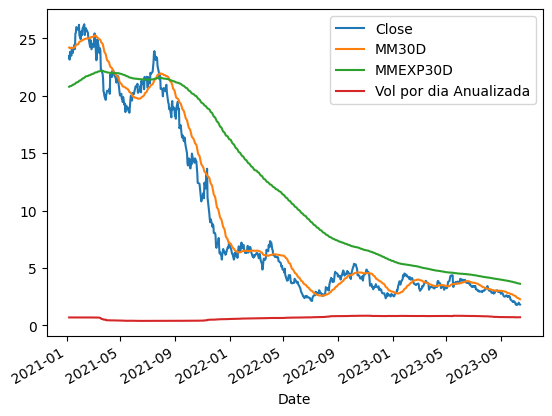

In [108]:
#volatilidade retorno diario anual 
volatilidade_diaria_mglu3 = dados_mglu3['Close'].pct_change().rolling(250).std()
volatilidade_anualizada_mglu3 = volatilidade_diaria_mglu3 * np.sqrt(252)
dados_mglu3['Vol por dia Anualizada'] = volatilidade_anualizada_mglu3.values
dados_mglu3 = dados_mglu3.dropna()
dados_mglu3.plot()